**Задание 1: Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.**

In [132]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Необходимо заменить значения массива данных так, чтобы:
    y_pred = 0 | y_pred -> 0 и 
    1 - y_pred = 0 | 1 - y_pred -> 0, соответсвенно будем заменять 0 на очень малое число, а 1 на 1 минус очень малое число.

In [133]:
def calc_logloss(y, y_pred):
    coef = 0.0001
    y_pred = np.clip(y_pred, a_min = coef, a_max = 1-coef)
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

**Задание 2: Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.**

In [134]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

Стандартизируем признаки:

In [135]:
def calc_std(x):
    x[1:] = ((x[1:].T - x[1:].mean(axis=1))/x[1:].std(axis = 1)).T
    return x

In [136]:
x = calc_std(X)

In [137]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [138]:
def eval_model(X, y, iterations, alpha):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    errors = []
    list_w = []
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        errors.append(err)
        list_w.append(W)       
        if i > 2 and np.abs(err - errors[-2]) < 1e-5:
            break
    return errors, list_w, i

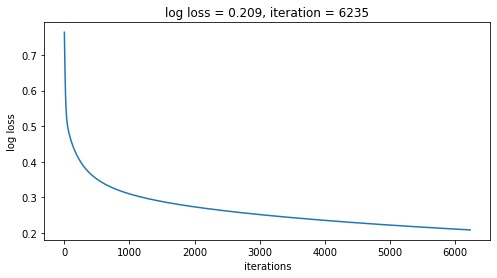

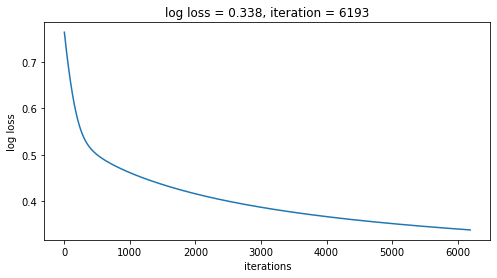

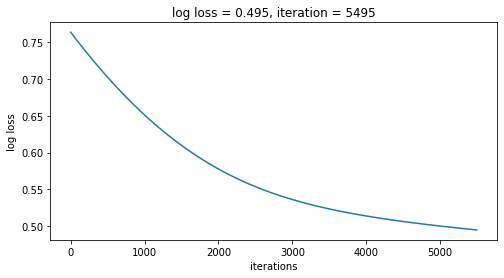

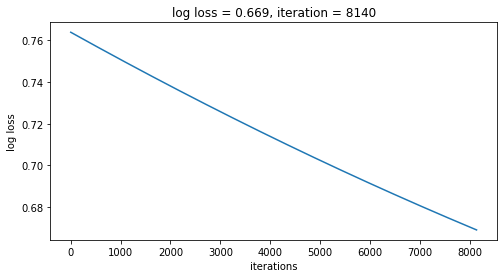

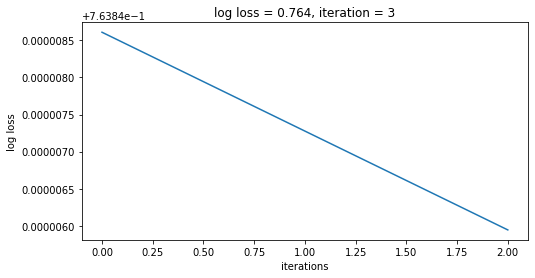

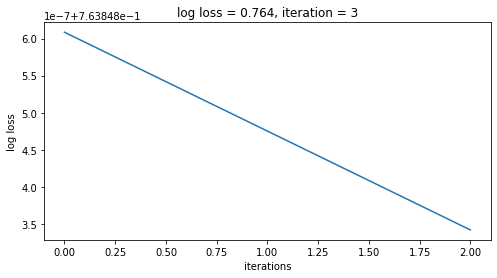

In [139]:
for alpha in [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]:
    errors, list_w, i = eval_model(X=X, y=y, iterations = 1000000, alpha=alpha)
    fig = plt.figure(figsize =(8,4))
    plt.title(f'log loss = {np.round_(errors[-1], decimals = 3)}, iteration = {i}')
    plt.plot(errors)
    plt.xlabel('iterations')
    plt.ylabel('log loss')

Отптимальным будет alpha = 0.1, при 6235 итерациях.

**Задание 3: Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).**

In [143]:
def calc_pred_proba(W,X):
    y_pred = 1/(1+np.exp(-np.dot(W,X)))
    return y_pred

In [149]:
y_pred = calc_pred_proba(list_w[-1], X)
y_pred

array([0.19407073, 0.2392804 , 0.69228346, 0.21581879, 0.84506948,
       0.27414839, 0.97377602, 0.98262963, 0.18383777, 0.75855016])

**Задание 4: Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).**

In [155]:
def calc_pred(W,X):
    y_pred = calc_pred_proba(W, X)
    for i in range(len(y_pred)):
        if (y_pred[i] > 0.5): 
            y_pred[i] = 1
        elif (y_pred[i] <= 0.5):
            y_pred[i] = 0
    return y_pred

In [159]:
y_pred = calc_pred(list_w[-1], X)
y_pred

array([0., 0., 1., 0., 1., 0., 1., 1., 0., 1.])

**Задание 5: Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.**

In [173]:
def calc_accuracy(y,y_pred):
    value = np.arange(10)
    for i in range(len(y_pred)):
        if (y_pred[i] == y[i]): 
            value[i] = 1
        elif (y_pred[i] != y[i]): 
            value[i] = 0
    accuracy = sum(value)/len(y_pred)
    return accuracy

In [174]:
accuracy = calc_accuracy(y,y_pred)
accuracy

0.8

In [196]:
def conf_matrix(y,y_pred):
    conf_matrix = np.zeros(shape=(2,2))
    #TP
    conf_matrix[0,0] = np.sum(np.where(y==1,y==y_pred,False))
    #TN
    conf_matrix[1,1] = np.sum(np.where(y==0,y==y_pred,False))
    #FN
    conf_matrix[1,0] = np.sum(np.where(y==1,y!=y_pred,False))
    #FP
    conf_matrix[0,1] = np.sum(np.where(y==0,y!=y_pred,False))
    
    return conf_matrix

In [193]:
conf_matrix = conf_matrix(y,y_pred)
conf_matrix

array([[4., 1.],
       [1., 4.]])

In [188]:
conf_matrix.flatten()

array([4., 1., 1., 4.])

In [199]:
def calc_preсision_recall(y,y_pred):
    conf_matrix_ = conf_matrix(y,y_pred).flatten()               
    tp, tn, fn, fp = conf_matrix_.flatten()
    preсision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*preсision*recall/(preсision+recall)                     
    return preсision, recall, f1_score

In [200]:
preсision, recall, f1_score = calc_preсision_recall(y,y_pred)
preсision, recall, f1_score

(0.5, 0.8, 0.6153846153846154)